The data consists of nearly 1,677 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")


warnings.filterwarnings("ignore")

In [80]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [81]:
data

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


## <b><span style='color:#68A19B'>1.1</span> | Summary Statistics of numeric variables</b>

In [6]:
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


## <b><span style='color:#68A19B'>1.2</span> | Summary Statistics of categorical variables</b>

In [7]:
cat_cols=data.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data.select_dtypes(include=object).describe())
display(cat_df)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1677,1677,1677,1677,1677,1677,1677,1677
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1290,1167,775,1064,355,773,1677,1277


count
column         value                           
BusinessTravel Non-Travel                   126
               Travel_Frequently            261
               Travel_Rarely               1290
Department     Human Resources               39
               Sales                        471
               Research & Development      1167
EducationField Human Resources               13
               Other                         82
               Technical Degree             106
               Marketing                    152
               Medical                      549
               Life Sciences                775
Gender         Female                       613
               Male                        1064
JobRole        Human Resources               34
               Research Director             71
               Sales Representative          77
               Manager                      111
               Healthcare Representative    155
               Manufacturing Director       196
               Laboratory Technician        334
               Research Scientist           344
               Sales Executive              355
MaritalStatus  Divorced                     327
               Single                       577
               Married                      773
Over18         Y                           1677
OverTime       Yes                          400
               No                          1277

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Exploratory Data Analysis</p></div>

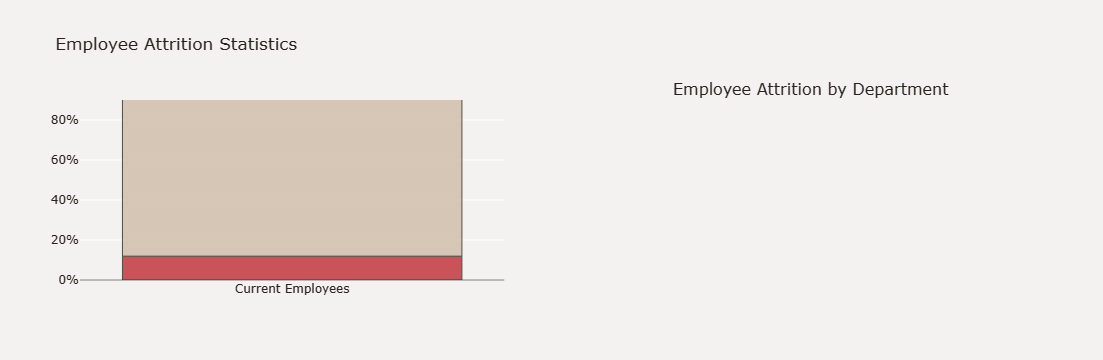

In [9]:
fig=make_subplots(rows=1, cols=2, 
                  subplot_titles=("", "Employee Attrition by Department"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=data['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=data[data.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=1, col=2)
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')      
fig.show()

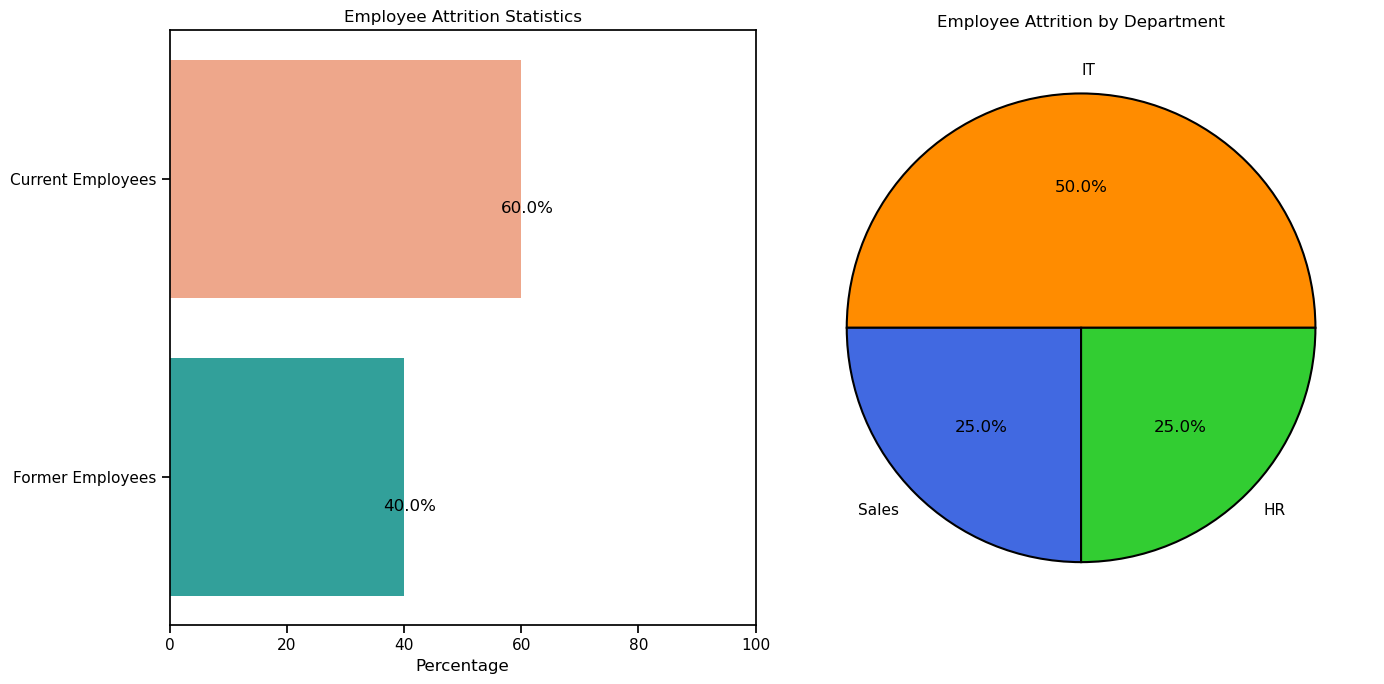

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace this with your actual DataFrame)
data = pd.DataFrame({
    'Attrition': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Department': ['Sales', 'HR', 'IT', 'Sales', 'IT', 'HR', 'Sales', 'HR', 'IT', 'Sales']
})

# Data preparation for Attrition Statistics
attrition_counts = data['Attrition'].value_counts(normalize=True).mul(100)
attrition_labels = ['Former Employees' if i == 'Yes' else 'Current Employees' for i in attrition_counts.index]

# Data preparation for Attrition by Department
department_counts = data[data['Attrition'] == 'Yes']['Department'].value_counts(normalize=True).mul(100)

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Horizontal Bar Plot for Attrition Statistics
sns.barplot(
    x=attrition_counts.values, 
    y=attrition_labels, 
    ax=ax[0], 
    palette=['#FFA07A', '#20B2AA']
)
ax[0].set_title('Employee Attrition Statistics')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('')
ax[0].set_xlim(0, 100)
for i in ax[0].patches:
    ax[0].text(i.get_width() + 1, i.get_y() + 0.5, f'{i.get_width():.1f}%', ha='center', va='center')

# Pie Chart for Attrition by Department
ax[1].pie(
    department_counts.values, 
    labels=department_counts.index, 
    autopct='%1.1f%%', 
    colors=['#FF8C00', '#4169E1', '#32CD32', '#FFD700', '#DC143C'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
ax[1].set_title('Employee Attrition by Department')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


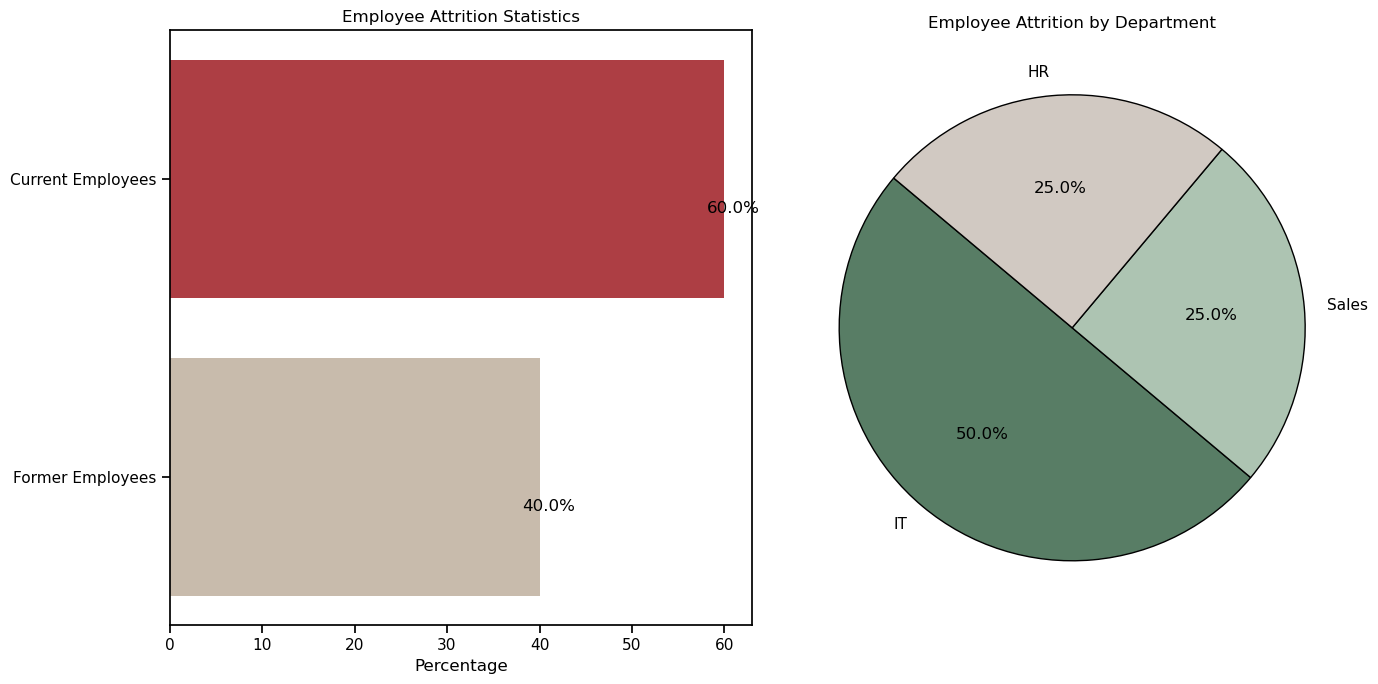

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data (replace 'data' with your actual DataFrame)
# Bar Chart Data for Attrition Statistics
plot_df = data['Attrition'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot_df.rename(columns={'index': 'Attrition'}, inplace=True)
plot_df['Attrition'] = ['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]

# Pie Chart Data for Attrition by Department
plot_df2 = data[data['Attrition'] == 'Yes']['Department'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot_df2.rename(columns={'index': 'Department'}, inplace=True)

# Set up the matplotlib figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Bar Chart for Employee Attrition Statistics
sns.barplot(
    x=plot_df['Percent'], 
    y=plot_df['Attrition'], 
    palette=['#C02B34', '#CDBBA7'], 
    ax=ax[0]
)
ax[0].set_title('Employee Attrition Statistics')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('')

# Add text labels to the bar chart
for i in ax[0].patches:
    ax[0].text(i.get_width() + 1, i.get_y() + 0.5, f'{i.get_width():.1f}%', ha='center', va='center')

# Pie Chart for Employee Attrition by Department
ax[1].pie(
    plot_df2['Percent'], 
    labels=plot_df2['Department'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#587D65', '#ADC4B2', '#D1C9C2'],
    wedgeprops={'edgecolor': 'black'}
)
ax[1].set_title('Employee Attrition by Department')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


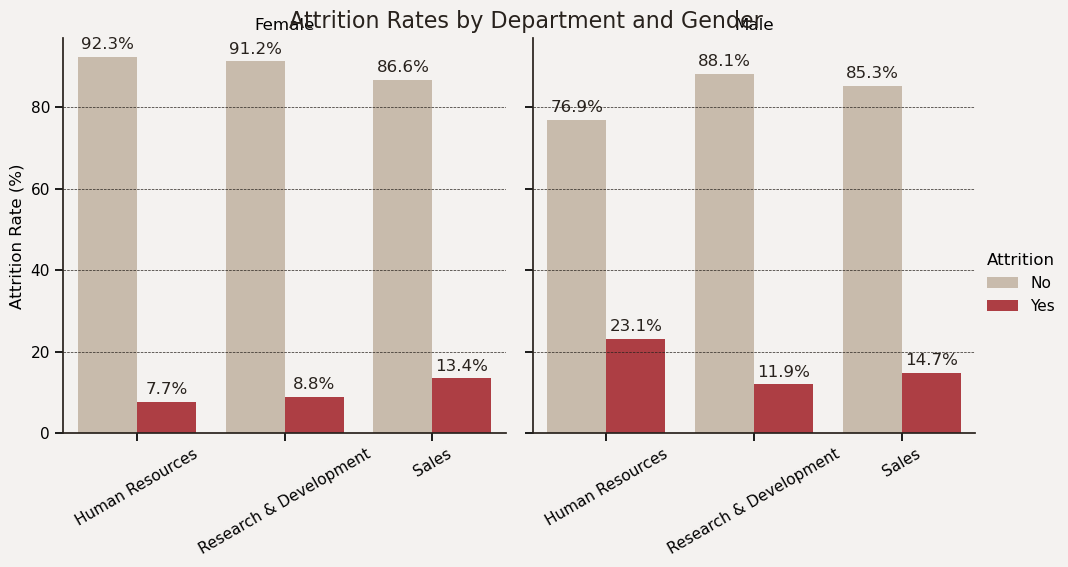

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data (replace 'data' with your actual DataFrame)
plot_df = data.groupby(['Gender', 'Department'])['Attrition'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

# Map numeric values to strings
plot_df['Attrition'] = plot_df['Attrition'].map({0: 'No', 1: 'Yes'})

# Define the color palette with correct keys
palette = {'Yes': '#C02B34', 'No': '#CDBBA7'}

# Set up the matplotlib figure with facets
g = sns.catplot(
    data=plot_df,
    x='Department',
    y='Percent',
    hue='Attrition',
    col='Gender',
    kind='bar',
    height=5,
    aspect=1,
    palette=palette,
    dodge=True
)

# Customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("", "Attrition Rate (%)")
g.set_xticklabels(rotation=30)

# Add text labels on bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points', 
                    color='#28221D')

# Customize the appearance of the figure
g.fig.suptitle('Attrition Rates by Department and Gender', fontsize=16, color='#28221D')
g.fig.patch.set_facecolor('#F4F2F0')  # Background color for the entire figure
for ax in g.axes.flat:
    ax.set_facecolor('#F4F2F0')  # Background color for each subplot
    ax.spines['bottom'].set_color('#28221D')
    ax.spines['top'].set_color('#28221D')
    ax.spines['right'].set_color('#28221D')
    ax.spines['left'].set_color('#28221D')
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='#28221D')  # Grid lines

plt.show()


Women in Sales department experienced the highest amount of turnover, with nearly 1 out of every 7 women in HR leaving the company. For men, the highest turnover occurred in the Human Resources.

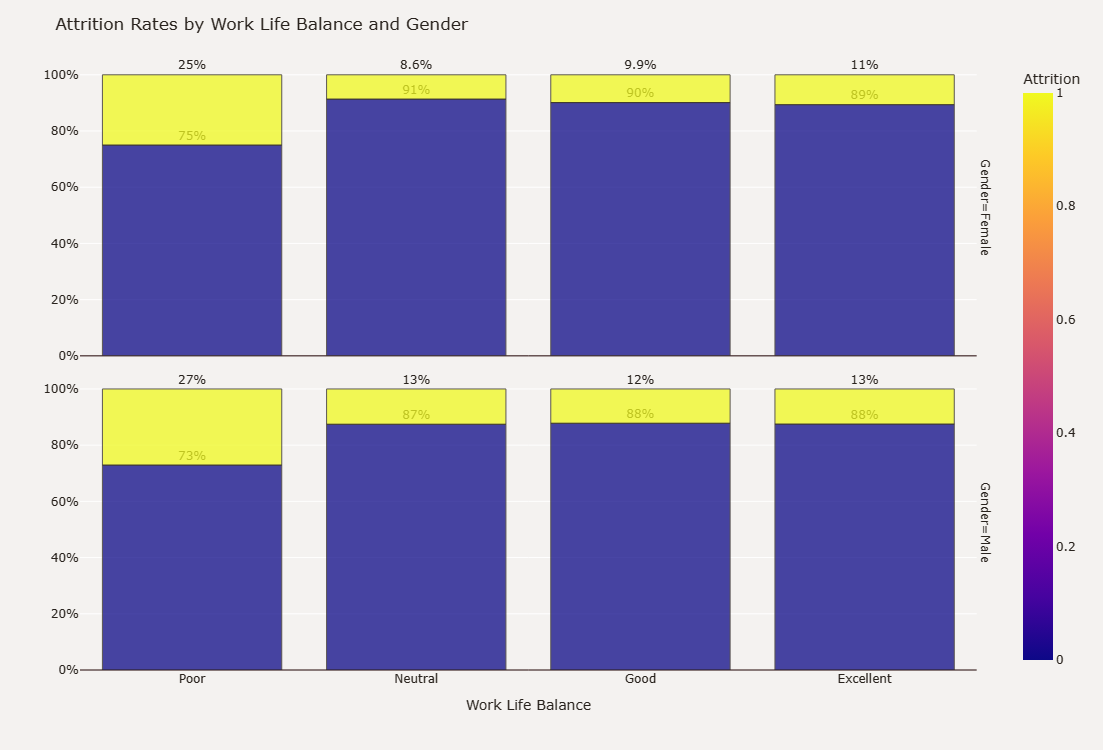

In [36]:
plot_df = data.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202',ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height=750,font_color='#28221D',
                  xaxis_title='Work Life Balance', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Neutral', 'Good', 'Excellent']))
fig.show()

Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance. 

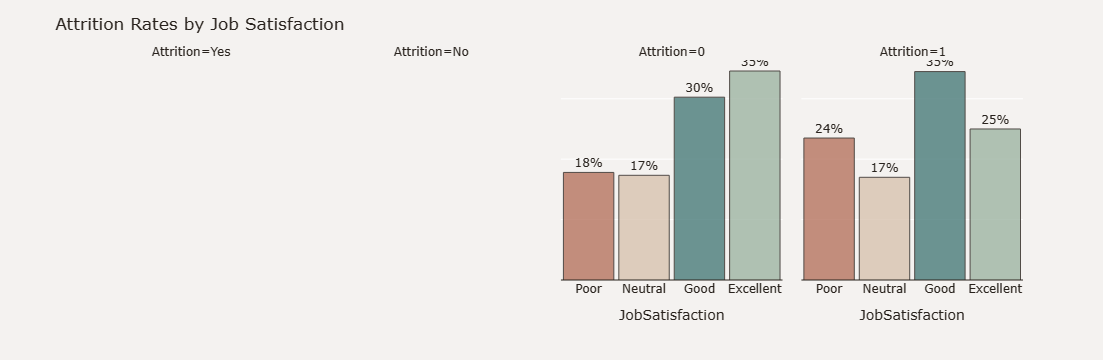

In [38]:
plot_df = data.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')
plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
    {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='JobSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09,font_color='#28221D',
                  xaxis_title='Job Satisfaction',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Among employees who left, the majority were satisfied in their job with 53% rating their job satisfaction as Good or Excellent, while 28% were the least satisfied in their job.

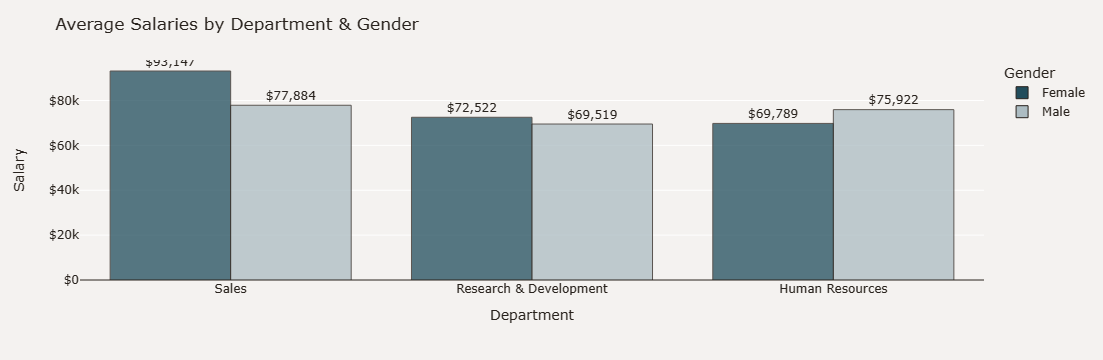

In [42]:
plot_df = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Across each department, women on average have higher salaries than men. 

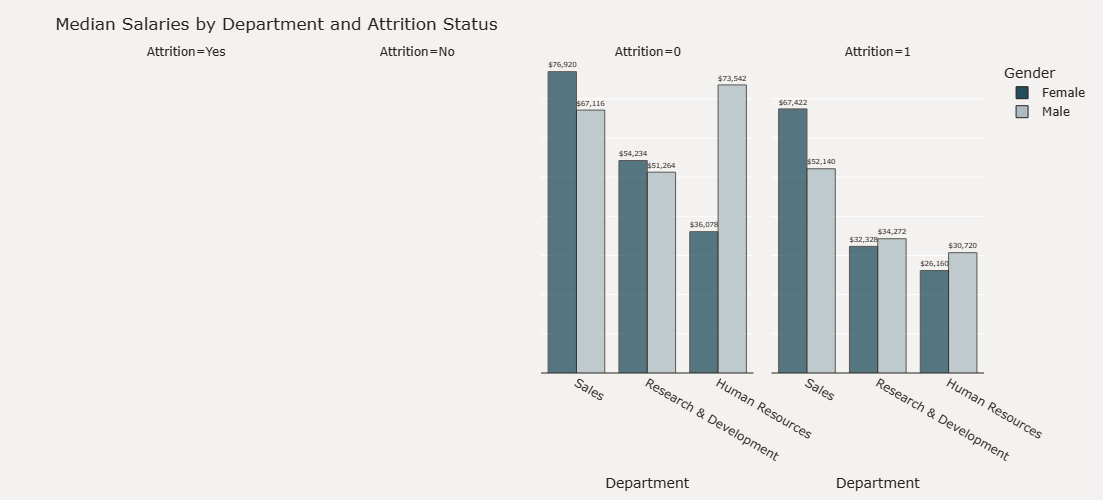

In [43]:
plot_df = data.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

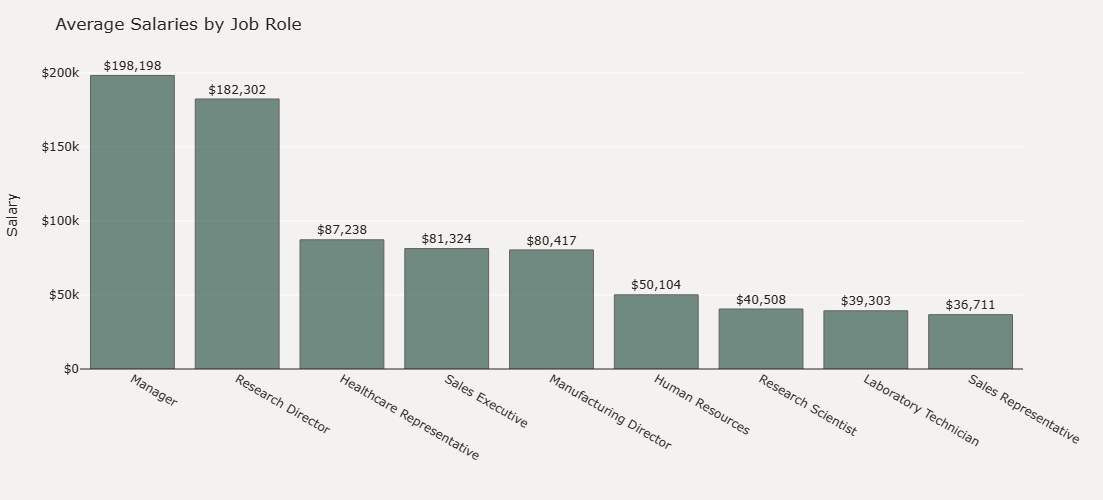

In [44]:
plot_df = data.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Managers and Research Directors have the highest average salaries, while Laboratory Technicians and Sales Representatives have the lowest.

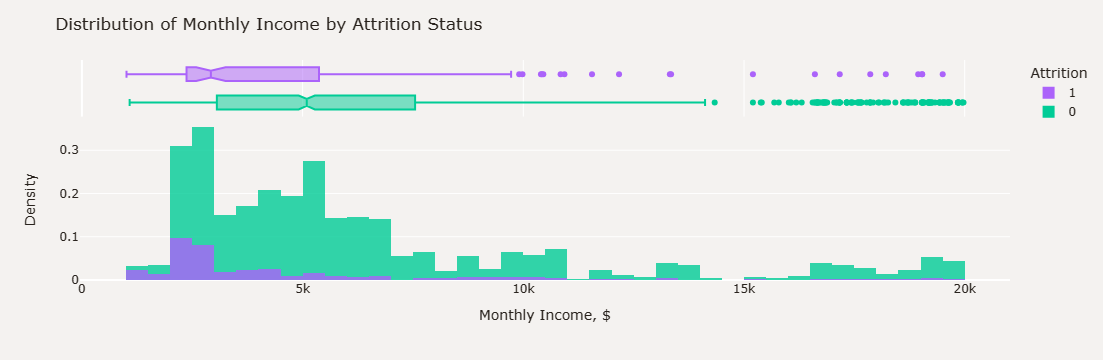

In [45]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. Former employees had a median monthly income more than $2,000 less than current employees.

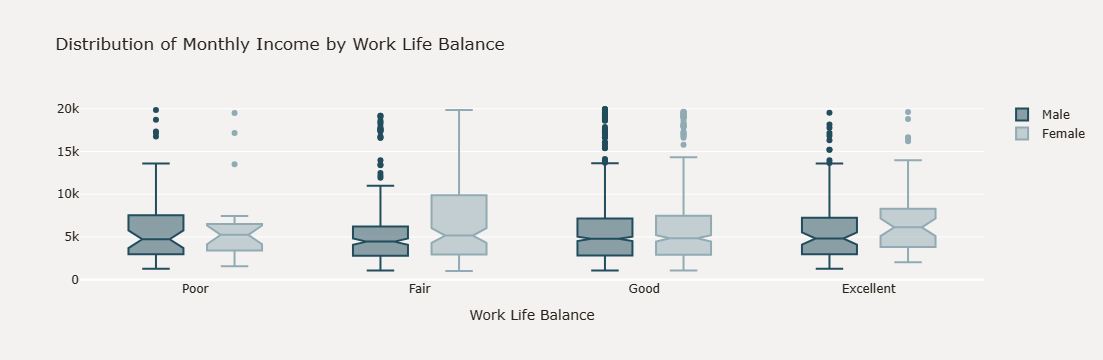

In [46]:
fig=go.Figure()
colors=['#214D5C','#91ABB4']
for i, j in enumerate(data['Gender'].unique()):
    df_plot=data[data['Gender']==j]
    fig.add_trace(go.Box(x=df_plot['WorkLifeBalance'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
fig.update_layout(title='Distribution of Monthly Income by Work Life Balance',
                  xaxis_title='Work Life Balance', boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Fair', 'Good', 'Excellent']),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [52]:
data

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


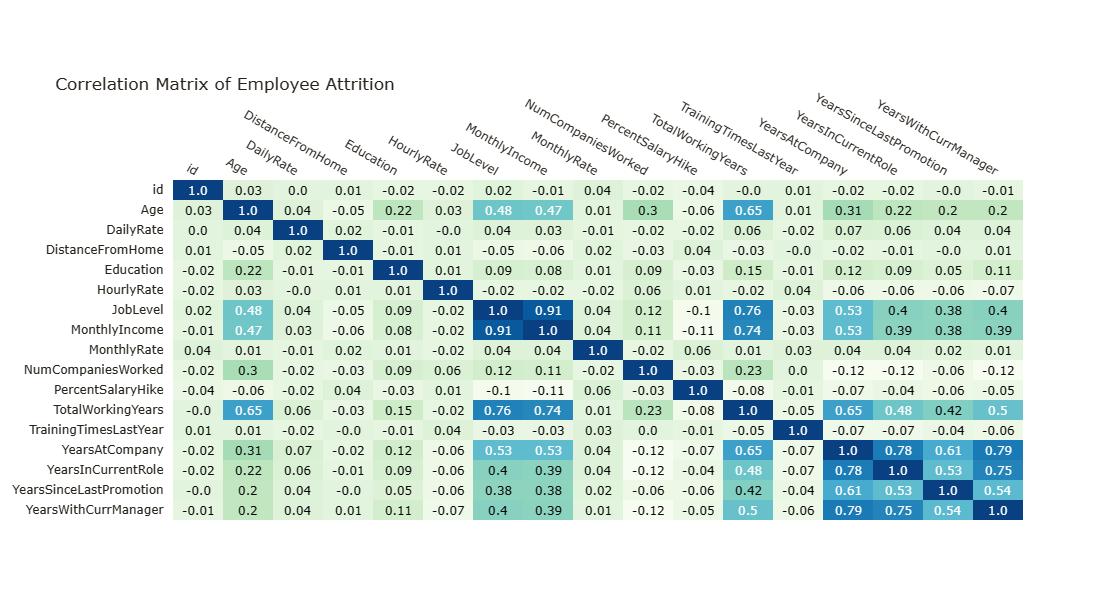

In [57]:
cat_cols=[]
for i in data.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
corr=df.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition", 
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()

Confirming our findings in the scatterplot above, `MonthlyIncome` has a strong positive correlation with `TotalWorkingYears`(correlation = 0.91) and `TotalWorkingYears` (correlation = 0.74). Additionally, `YearsAtCompany` has a strong positive association with `YearsWithCurrManager` (correlation = 0.79), as well as with `YearsInCurrentRole` (correlation = 0.78). 

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Data Cleaning and Preprocessing</p></div>

There are several columns in the data that have numeric values that represent categories, like `Education` that has values of 1 through 5 representing different levels of education. These columns were converted to categorical variables to perform significance testing for feature selection. I then removed columns with zero variance from the data since these can lead to errors in model fitting. Lastly, to reduce the skewness in the data, I log-transformed variables that had a skewness above 0.75.

In [61]:
# Checking for variables with 0 variance
norm_df=data.copy()
nzv=[]
for i in norm_df[cat_cols]:
    norm_df[i]=pd.factorize(norm_df[i])[0]
for i in norm_df.columns:
    if stdev(norm_df[i]) == 0.0:
        nzv.append(i)

# Converting cols to category
for i in data[cat_cols]:
    if i=='Attrition':
        continue
    data[i] = pd.Categorical(data[i])

# Removing variables with 0 variance and Employee Number
print("Dropping variables with zero variance:", nzv)
data.drop(data[nzv], axis=1, inplace=True)
df=data.copy()
df.shape

Dropping variables with zero variance: ['EmployeeCount', 'Over18', 'StandardHours']


(1677, 32)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        1677 non-null   int64   
 1   Age                       1677 non-null   int64   
 2   BusinessTravel            1677 non-null   category
 3   DailyRate                 1677 non-null   int64   
 4   Department                1677 non-null   category
 5   DistanceFromHome          1677 non-null   int64   
 6   Education                 1677 non-null   int64   
 7   EducationField            1677 non-null   category
 8   EnvironmentSatisfaction   1677 non-null   category
 9   Gender                    1677 non-null   category
 10  HourlyRate                1677 non-null   int64   
 11  JobInvolvement            1677 non-null   category
 12  JobLevel                  1677 non-null   int64   
 13  JobRole                   1677 non-null   catego

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Hypothesis Testing</p></div>
## <b><span style='color:#68A19B'>I.</span> Independent T-Test</b>

To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.

#### Hypothesis:

$H_{0}$: The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees. 
$$
  u_{1} = u_{2}
$$  
$H_{1}$: The alternative hypothesis is that the average monthly income of former employees is different than current employees.
$$
  u_{1} \neq u_{2}
$$

In [65]:
!pip install researchpy

In [84]:
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================")

BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
BusinessTravel
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: count, dtype: int64
Department : ['Research & Development' 'Sales' 'Human Resources']
Department
Research & Development    1167
Sales                      471
Human Resources             39
Name: count, dtype: int64
EducationField : ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: count, dtype: int64
Gender : ['Male' 'Female']
Gender
Male      1064
Female     613
Name: count, dtype: int64
JobRole : ['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
JobRole
Sales Executive              3

In [78]:
import researchpy as rp
summary, res=rp.ttest(group1=df['MonthlyIncome'][df['Attrition']==1], 
                      group2=df['MonthlyIncome'][df['Attrition']==0], 
                      group1_name='Former Employees', group2_name='Current Employees')
print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,200.0,4637.795000,3884.922921,274.705534,4096.087624,5179.502376
1,Current Employees,1477.0,6407.052133,4559.698575,118.644029,6174.323267,6639.780999
2,combined,1677.0,6196.049493,4520.050754,110.376541,5979.559106,6412.539880


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-1769.2571
1,Degrees of freedom =,1675.0000
2,t =,-5.2358
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3945
7,Hedge's g =,-0.3943
8,Glass's delta1 =,-0.4554
9,Point-Biserial r =,-0.1269


The p-value of the T-Test is 0, which is less than our significance level, $a$, of 0.05. Therefore, there is evidence to support that the average monthly income of former employees is different than the average monthly income of current employees.

## <b><span style='color:#68A19B'>II.</span> Chi-Square Test of Independence</b>

To determine if there is a relationship between `Attrition` and the other categorical variables in the data set, I will use the chi-square test of independence. The null hypothesis for this test is that the variables are independent, there is no association between `Attrition` and the variable being tested, while the alternative hypothesis is that that there is a relationship.

In [85]:
cat_cols=df.select_dtypes(include="category").columns.tolist() 
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df[cat_cols]:
    observed=pd.crosstab(index=df["Attrition"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Department are independent (p-value = 0.08).

Attrition and EducationField are independent (p-value = 0.18).

Attrition and Gender are independent (p-value = 0.10).

Attrition and PerformanceRating are independent (p-value = 0.66).



,Variable,Chi_Statistic,P_value
12,StockOptionLevel,100.138245,1.451343e-21
6,JobRole,78.669921,9.052128e-14
8,MaritalStatus,55.152626,1.056232e-12
9,OverTime,49.500724,1.982985e-12
5,JobInvolvement,43.859068,1.616880e-09
0,BusinessTravel,22.717903,1.166461e-05
3,EnvironmentSatisfaction,17.122202,6.669976e-04
11,RelationshipSatisfaction,16.836046,7.637866e-04
13,WorkLifeBalance,14.376571,2.434909e-03
7,JobSatisfaction,8.977448,2.959224e-02


Based on the chi square test results, factors that are significant in whether an employee stays at the company include their work life balance, job satisfation, whether or not they work overtime, their stock options, and the department they work in. Variables that are independent of attrition, like `Department`, `EducationField`, `Gender`, and `PerformanceRating`, will be removed from the predictors in the model.

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Predicting Employee Attrition</p></div>

## <b><span style='color:#68A19B'>I.</span>  Encode Categorical Columns</b>

In [123]:
y=df['Attrition'].apply(lambda x: 1 if x==1 else 0)
X=df.loc[:, df.columns != 'Attrition']
X.drop(X[vars_rm], axis=1, inplace=True)
X=pd.get_dummies(X, columns=chi_df.Variable.values, drop_first=True)
X.columns=X.columns.str.replace(' ', '')
X.head()

,id,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,EnvironmentSatisfaction_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4
0,0,36,599,24,3,42,1,2596,5099,1,...,True,True,False,False,False,True,False,False,False,True
1,1,35,921,8,3,46,1,2899,10778,1,...,False,False,False,True,False,True,False,False,False,False
2,2,32,718,26,3,80,2,4627,16495,0,...,False,False,False,True,False,True,False,False,False,True
3,3,38,1488,2,3,40,2,5347,13384,3,...,False,False,True,False,False,False,False,False,False,False
4,4,50,1017,5,4,37,5,19033,19805,1,...,False,False,True,False,False,True,False,False,False,False


## <b><span style='color:#68A19B'>II.</span> Create Training, Validation, and Test Sets</b>

In [124]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1173, 48) (1173,)
Validation set Shape: (252, 48) (252,)
Test set Shape: (252, 48) (252,)


## <b><span style='color:#68A19B'>III.</span> Scale Features</b>

In [125]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,id,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,EnvironmentSatisfaction_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4
0,-1.151597,1.031086,-0.144360,-0.862305,0.995386,0.191039,-0.008784,-0.332836,-0.891457,1.804923,...,-0.678802,-0.484496,-0.680142,1.467387,-0.546812,0.737171,-0.308607,-0.447900,-0.690891,1.436197
1,1.616679,2.675815,-1.805013,-0.862305,0.995386,1.513999,0.927915,0.340224,0.161734,0.174132,...,1.473184,-0.484496,1.470281,-0.681483,-0.546812,0.737171,-0.308607,-0.447900,1.447407,-0.696283
2,-0.087833,-0.026240,-1.204745,0.414821,0.995386,-1.030155,-0.945483,-0.748484,-0.963945,1.804923,...,-0.678802,-0.484496,1.470281,-0.681483,-0.546812,0.737171,-0.308607,-0.447900,1.447407,-0.696283
3,-1.661707,0.208721,-0.911222,-0.223742,0.024823,-1.030155,0.927915,0.836995,-0.773135,-1.048962,...,-0.678802,2.063998,-0.680142,-0.681483,-0.546812,0.737171,-0.308607,2.232643,-0.690891,-0.696283
4,-0.850923,-0.496163,1.524227,2.458223,-0.945740,0.648987,-0.008784,-0.168583,-1.506758,0.174132,...,-0.678802,2.063998,-0.680142,-0.681483,-0.546812,0.737171,-0.308607,-0.447900,-0.690891,1.436197


## <b><span style='color:#68A19B'>IV.</span>  Tune Parameters of Random Forest</b>

In [126]:
# Parameter tuning
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = 0.801
Best Params: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=500, random_state=92)


## <b><span style='color:#68A19B'>V.</span>    Feature importance</b>

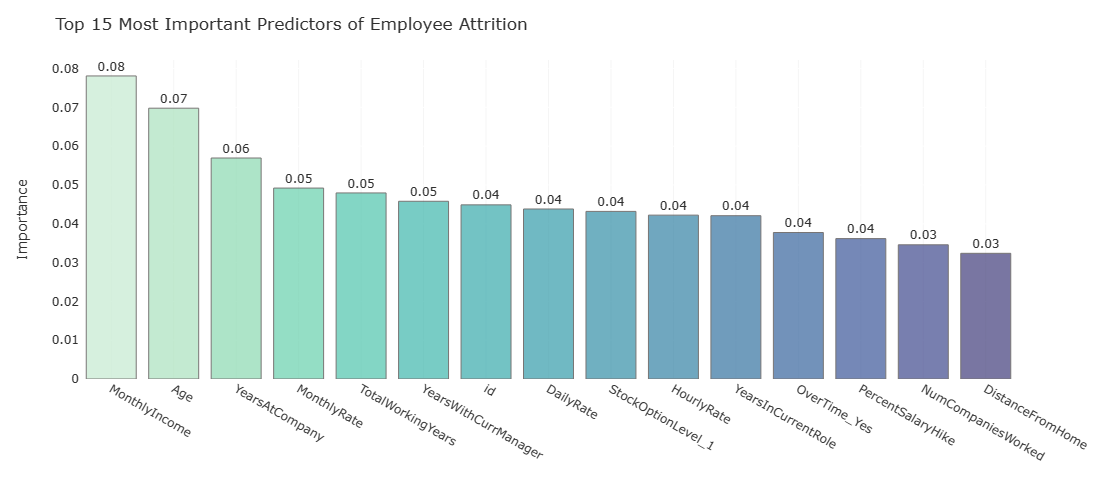

In [127]:
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_cv.best_estimator_.feature_importances_}, index=X_train.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(15, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 15 Most Important Predictors of Employee Attrition', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

This bar graph shows the most important variables in predicting employee attrition using random forest's Gini importance measure. Variable importance is calculated by the decrease in the tree node's impurity from splitting on that feature, averaged over all of the trees in the model. Based on this graph, monthly income, age, and working overtime are the most important predictors of employee attrition. In addition, information related to their job history, like the total number of years they've worked and the length of time they've been with the company and with their current manager, as well as their proximity to the office and salary rate increases are some of the most important contributors in predicting employee attrition.

## <b><span style='color:#68A19B'>VI.</span> Model evaluation</b>

In [129]:
val_auc=roc_auc_score(y_val, rf_cv.predict_proba(X_val)[:,1])
test_auc=roc_auc_score(y_test, rf_cv.predict_proba(X_test)[:,1])
val_acc=accuracy_score(y_val, rf_cv.predict(X_val))
test_acc=accuracy_score(y_test, rf_cv.predict(X_test))
print("Validation Accuracy: {:.1f}% and AUC = {:.3f}".format(val_acc*100, val_auc))
print("Test set Accuracy: {:.1f}% and AUC = {:.3f}".format(test_acc*100, test_auc))

Validation Accuracy: 90.1% and AUC = 0.817
Test set Accuracy: 86.1% and AUC = 0.776
